<a href="https://colab.research.google.com/github/ndalut5/Breast-Cancer-Detection-using-ML/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Understanding the Dataset**



*   Knowing what each feature represents.
*   Identifying the types of data (numerical, categorical) for each feature.
*   Understanding the target variable, which typically is a binary classification indicating the presence or absence of breast cancer.








In [2]:
# Let's start by loading the dataset to take a look at its structure and then perform the requested EDA tasks.
import pandas as pd

# Load the dataset
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**2. Exploratory Data Analysis (EDA)**


*   Statistical Summary: Generating descriptive statistics to understand the distribution of the data.
*   Data Visualization: Using histograms, box plots, and scatter plots to visualize the distribution and relationships between features.
*   Correlation Analysis: Identifying the correlations between features and with the target variable. This helps in understanding potential predictors for your models.





1. Descriptive statistics to understand the distribution of the data

In [3]:
# Generating descriptive statistics to understand the distribution of the data
descriptive_stats = data.describe()

# Checking the balance of the target variable "diagnosis"
target_distribution = data['diagnosis'].value_counts(normalize=True)

descriptive_stats, target_distribution

(                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
 count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
 mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
 std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
 min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
 25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
 50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
 75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
 max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   
 
        smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 count       569.000000        569.000000      569.000000           569.000000   
 mean          0.096360          0.104341        0.088799             0.048919   
 std           0.014064         

2. Data visualization to explore the distribution and relationships between features

<ipython-input-4-838bd4c80fce>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=data, ax=axes[1, 0], palette="husl")
<ipython-input-4-838bd4c80fce>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='texture_mean', data=data, ax=axes[1, 1], palette="husl")
<ipython-input-4-838bd4c80fce>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, ax=axes[2, 1], palette="husl")


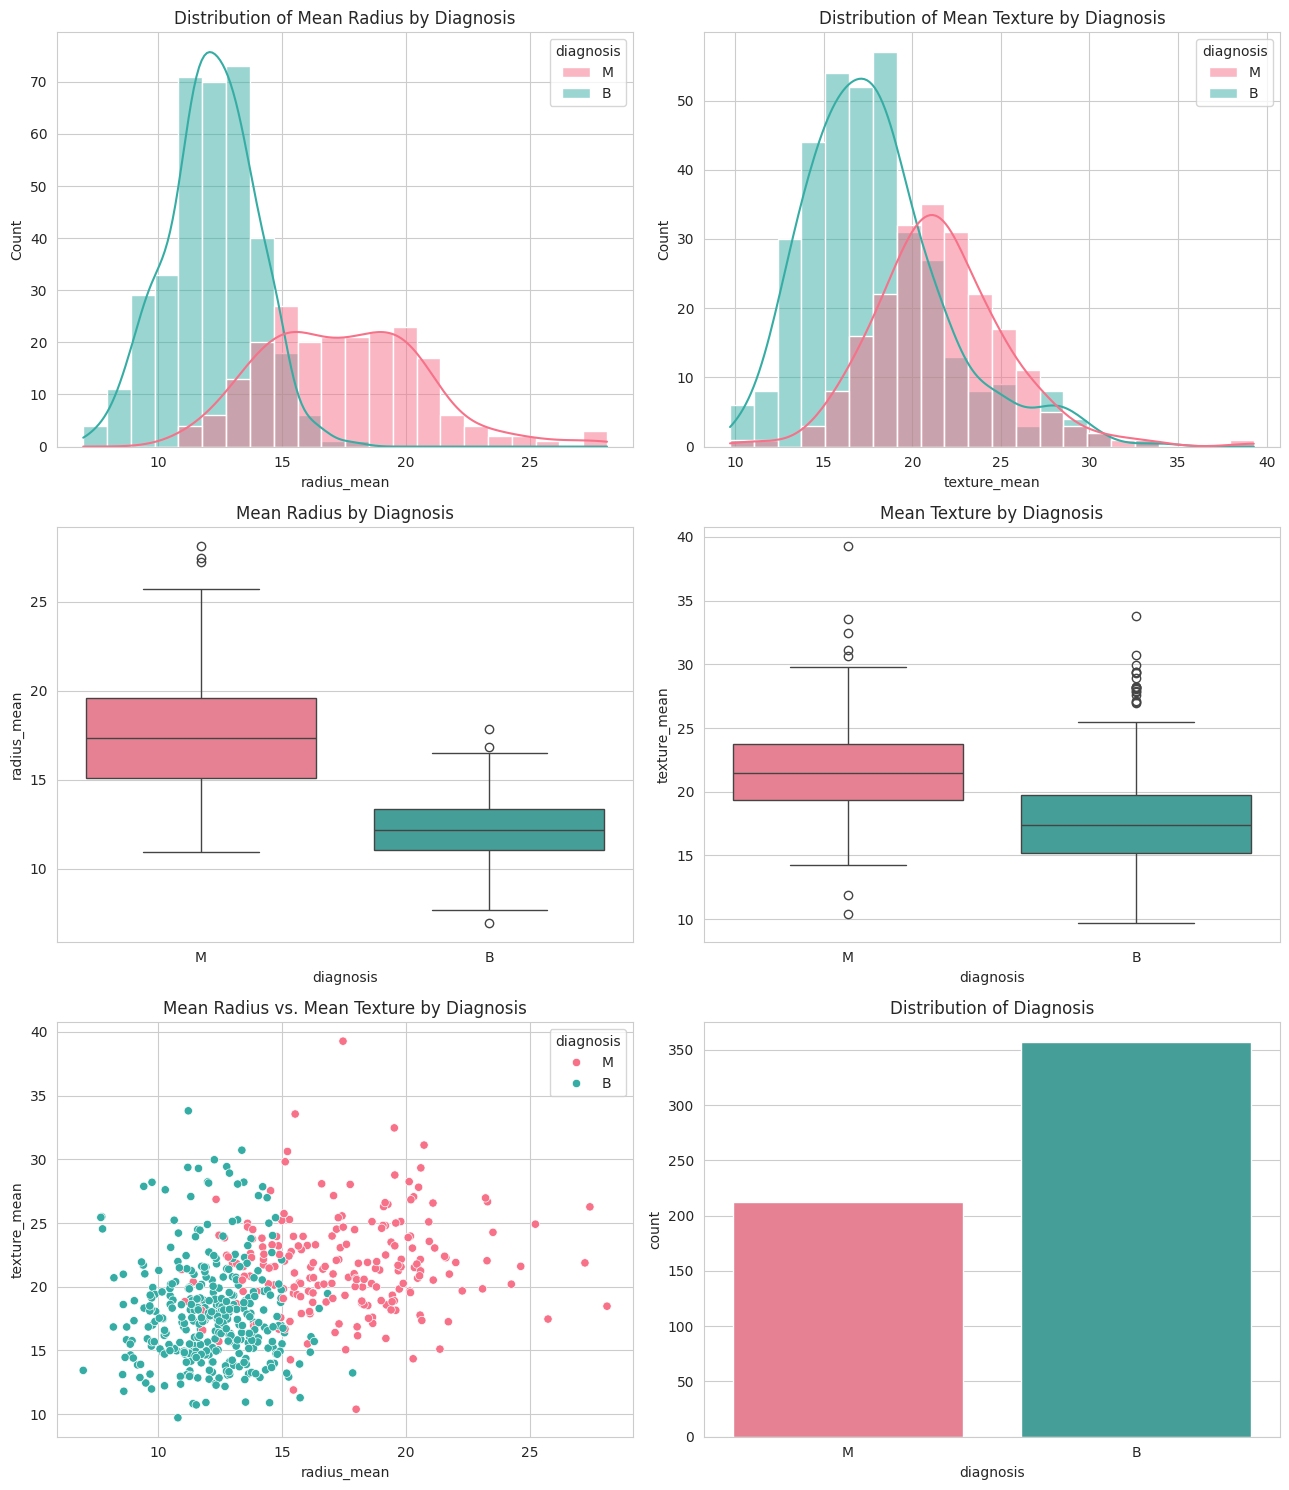

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Preparing for visualizations
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 15))

# Histogram of two features for distribution
sns.histplot(data=data, x='radius_mean', kde=True, hue='diagnosis', ax=axes[0, 0], palette="husl")
axes[0, 0].set_title('Distribution of Mean Radius by Diagnosis')

sns.histplot(data=data, x='texture_mean', kde=True, hue='diagnosis', ax=axes[0, 1], palette="husl")
axes[0, 1].set_title('Distribution of Mean Texture by Diagnosis')

# Box plots for two features to identify outliers
sns.boxplot(x='diagnosis', y='radius_mean', data=data, ax=axes[1, 0], palette="husl")
axes[1, 0].set_title('Mean Radius by Diagnosis')

sns.boxplot(x='diagnosis', y='texture_mean', data=data, ax=axes[1, 1], palette="husl")
axes[1, 1].set_title('Mean Texture by Diagnosis')

# Scatter plot for relationship between two features
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data, ax=axes[2, 0], palette="husl")
axes[2, 0].set_title('Mean Radius vs. Mean Texture by Diagnosis')

# Distribution of the target variable
sns.countplot(x='diagnosis', data=data, ax=axes[2, 1], palette="husl")
axes[2, 1].set_title('Distribution of Diagnosis')

plt.tight_layout()
plt.show()

Correlation Heatmap

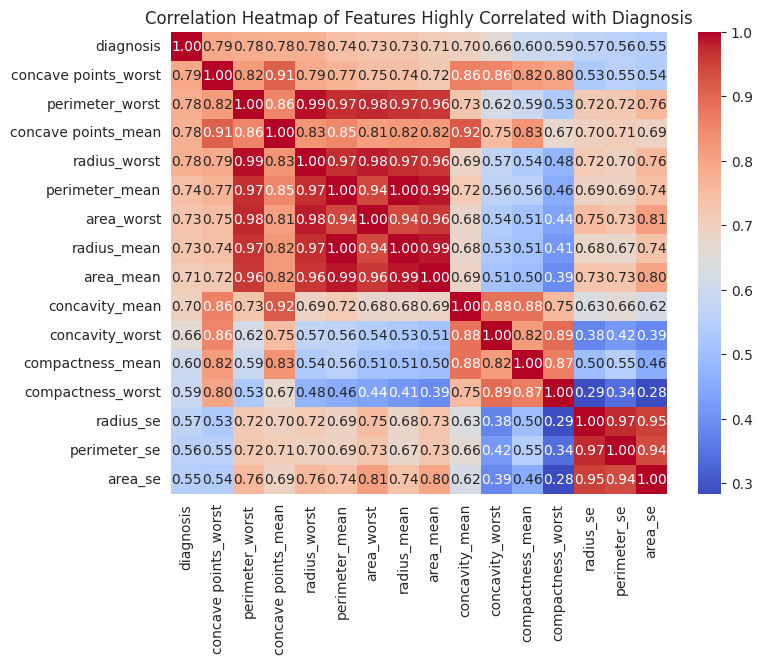

In [ ]:

# Encoding the 'diagnosis' column to numeric values
data_clean = data.copy()
data_clean['diagnosis'] = data_clean['diagnosis'].map({'M': 1, 'B': 0})

# Compute the correlation matrix
corr_matrix = data_clean.corr()

# Sorting the 'diagnosis' row/column in descending order to get features with the highest correlation
corr_diagnosis = corr_matrix.abs().sort_values(by='diagnosis', ascending=False)['diagnosis']

# Selecting features with correlation higher than 0.5 for visualization
high_corr_features = corr_diagnosis[corr_diagnosis > 0.5].index.tolist()

# Generating a smaller correlation matrix with high correlation features only
high_corr_matrix = data_clean[high_corr_features].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features Highly Correlated with Diagnosis')
plt.show()

**Most Important Features**

Printing out the top 10 most important features based on their correlation with the target variable (Diagnosis)

In [ ]:
import pandas as pd

# Data_clean is our DataFrame with the 'diagnosis' column encoded to numeric values

# Computing the correlation matrix
corr_matrix = data_clean.corr()

# Sorting the 'diagnosis' row/column in descending order to get features with the highest correlation
corr_diagnosis = corr_matrix.abs().sort_values(by='diagnosis', ascending=False)['diagnosis']

# Selecting the top 10 features with the highest correlation to 'diagnosis', excluding 'diagnosis' itself
top_10_features = corr_diagnosis[1:11].index.tolist()  # Skipping the first entry since it will be 'diagnosis' itself with a correlation of 1.0

# Print the features vertically
print("Top 10 most important features based on their correlation with diagnosis:")
for feature in top_10_features:
    print(feature)


Top 10 most important features based on their correlation with diagnosis:
concave points_worst
perimeter_worst
concave points_mean
radius_worst
perimeter_mean
area_worst
radius_mean
area_mean
concavity_mean
concavity_worst


**Plotting the most important features:**

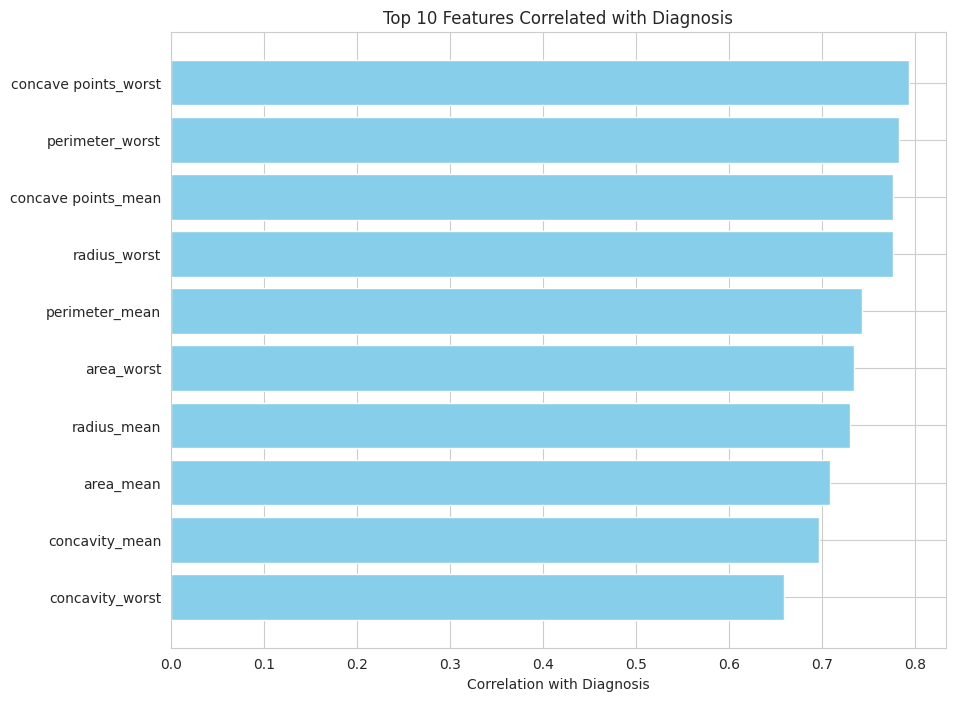

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr_matrix = data_clean.corr()

# Sorting the 'diagnosis' row/column in descending order to get features with the highest correlation
corr_diagnosis = corr_matrix.abs().sort_values(by='diagnosis', ascending=False)['diagnosis']

# Selecting the top 10 features with the highest correlation to 'diagnosis', excluding 'diagnosis' itself
top_10_features = corr_diagnosis[1:11]  # Exclude the first entry which is 'diagnosis'

# Plotting the top 10 features with their correlation to diagnosis as a bar graph
plt.figure(figsize=(10, 8))
plt.barh(top_10_features.index, top_10_features.values, color='skyblue')
plt.xlabel('Correlation with Diagnosis')
plt.title('Top 10 Features Correlated with Diagnosis')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest at the top
plt.show()


**3. Data Preprocessing**


*  Dropping unnecessary columns
*  Encoding target variable
*  Splitting the dataset into training and test sets (80-20)
*  Feature Scaling- Scaling features to normalize their range, especially important for models like SVM and k-NN.
*   SMOTE to balance the dataset
*  Feature Selection/Engineering-Selecting the most relevant features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Drop unnecessary columns
data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

# Splitting the dataset into training and test sets (80-20)
X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Correlation analysis for feature selection
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
corr_matrix = X_train_smote_df.corrwith(pd.Series(y_train_smote))
significant_features = corr_matrix.abs().sort_values(ascending=False)

#Now my training and test sets are ready for experomenation with various ML models

# Output the top 10 most significant features (just to confirm)
print(significant_features.head(10))

concave points_worst    0.798231
perimeter_worst         0.773076
concave points_mean     0.768586
radius_worst            0.765997
perimeter_mean          0.733319
radius_mean             0.720515
area_worst              0.714289
area_mean               0.690362
concavity_mean          0.673675
concavity_worst         0.655124
dtype: float64


**ML Models**

**1. k-Nearest Neighbors (KNN)**

Best number of neighbors: 2

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Performance Metrics:
Accuracy: 0.94
Precision: 0.93
Recall: 0.91
F1 Score: 0.92
AUC-ROC: 0.95


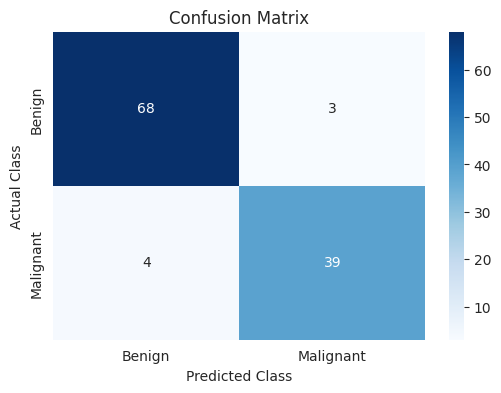

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# X_train_smote, y_train_smote, X_test_scaled, and y_test are already defined and available (from the data preprocessing step)

# Using GridSearchCV to find the best number of neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}  # I have set this range based on my dataset's size and characteristics as revealed in the EDA
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation
knn_cv.fit(X_train_smote, y_train_smote)

# Best number of neighbors
optimal_k = knn_cv.best_params_['n_neighbors']
print("Best number of neighbors:", optimal_k)

# Training the KNN model with the optimal number of neighbors
knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(X_train_smote, y_train_smote)

# Predicting the test set results
y_pred = knn_opt.predict(X_test_scaled)

# Evaluating the algorithm using various metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, knn_opt.predict_proba(X_test_scaled)[:, 1])

# Display metrics vertically
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

**Visualizing the Feature importance of the KNN model**


*   Analyzing the feature space to see which dimensions (features) contribute most to separating the classes.
*   We consider the the variance of each feature scaled by the inverse of the mean distance of the k-nearest points (this is just an estimate value)

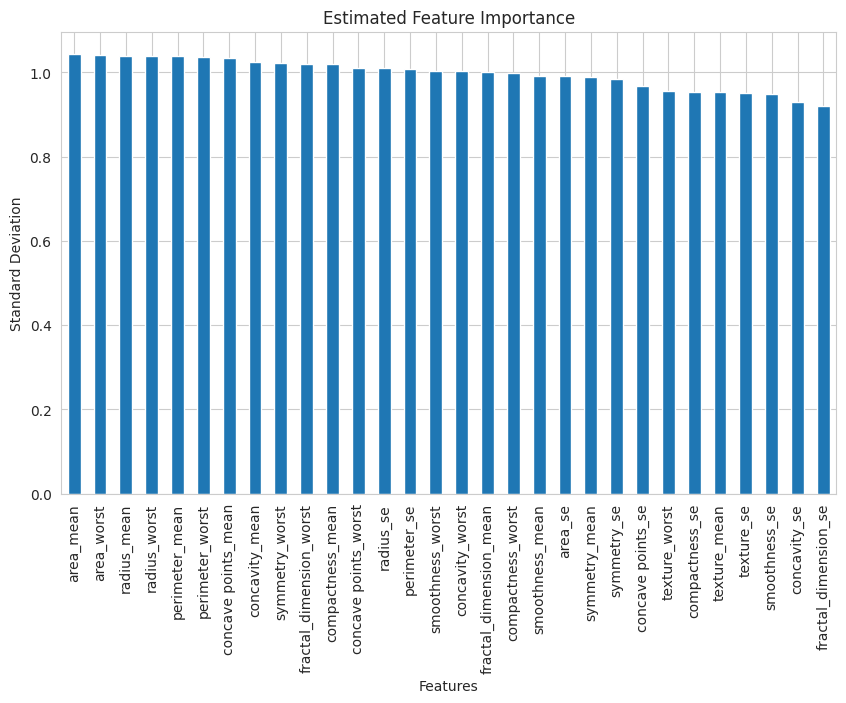

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#'X_train.columns' contains the feature names

# Converting numpy array to DataFrame
features_df = pd.DataFrame(X_train_smote, columns=X_train.columns)

# Calculating the feature standard deviations as a proxy for importance
feature_importance = features_df.std().sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Estimated Feature Importance')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.show()

**Visualizing the ROC for KNN**

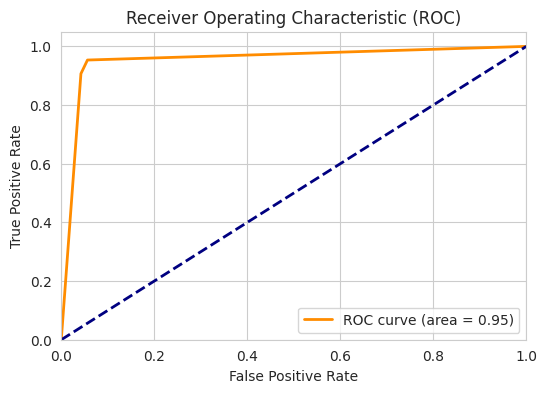

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_probs = knn_opt.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**2. Support Vector Machine**

*   Let's first use the standard/default parameters to see the results



Performance Metrics for SVM:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
AUC-ROC: 1.00

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



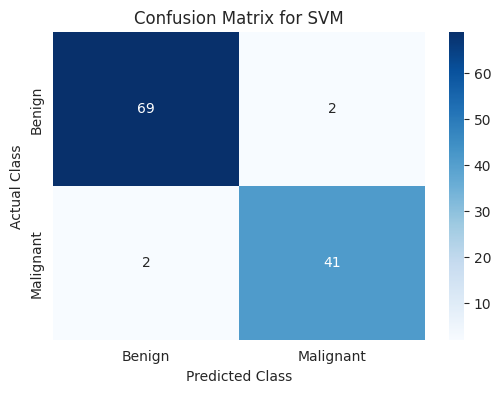

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the SVM classifier with a linear kernel
svm = SVC(kernel='linear', probability=True, random_state=42)

# Train the classifier
svm.fit(X_train_smote, y_train_smote)

# Prediction
y_pred_svm = svm.predict(X_test_scaled)

# Calculate the evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1])

# Print the evaluation metrics
print("\nPerformance Metrics for SVM:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
print(f"AUC-ROC: {auc_svm:.2f}")

# Print the classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


**SVM- Finding Optimal Parameters using Grid Search**

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

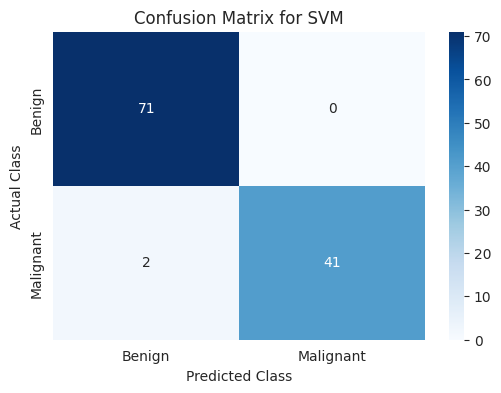

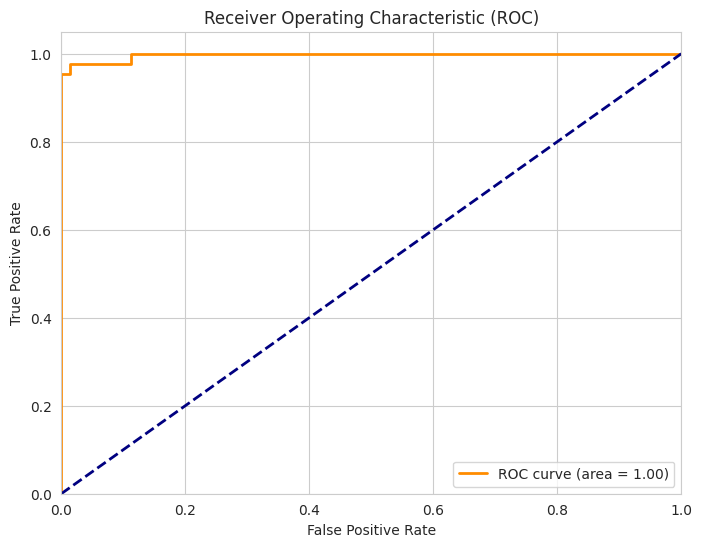

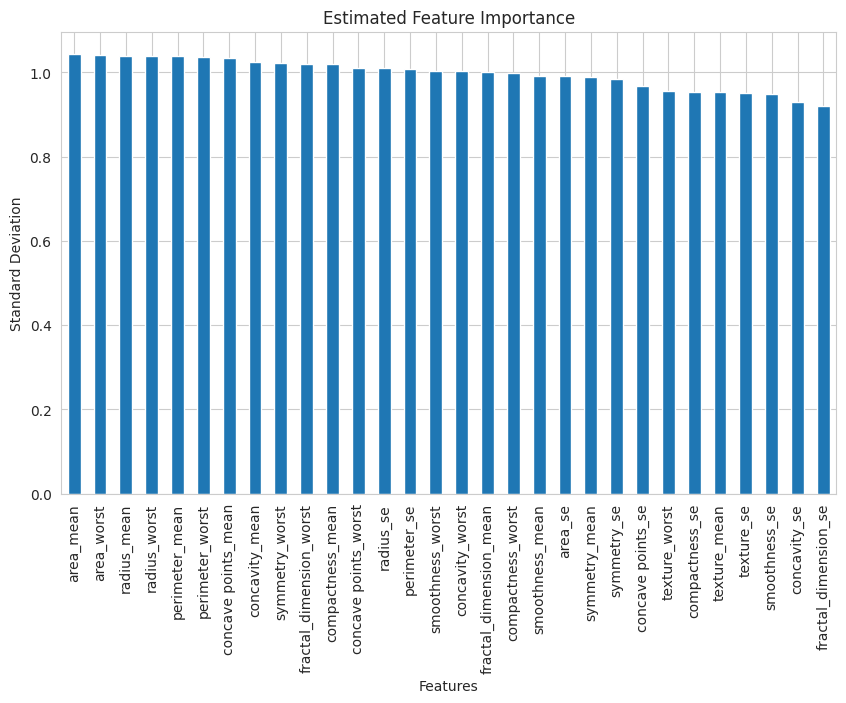

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

#'X_train_smote', 'y_train_smote', 'X_test_scaled', and 'y_test' were already defined during data preprocessing

# Initializing the SVM classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# Creating a parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}  # Expand or modify based on computational resources

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Train the grid search model
grid_search.fit(X_train_smote, y_train_smote)

# Retrieve the best SVM model
best_svm = grid_search.best_estimator_

# Predict on the test data
y_pred_svm = best_svm.predict(X_test_scaled)
y_probs_svm = best_svm.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_probs_svm)

# Print the evaluation metrics
print("\nPerformance Metrics for SVM:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
print(f"AUC-ROC: {auc_svm:.2f}")
print("Best parameters found: ", grid_search.best_params_)

# Classification report and confusion matrix
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:")
print(conf_mat_svm)

#VISUALIZATIONS:

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for SVM')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svm)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Feature Importance Estimation
# Based on standard deviation as a heuristic measure

features_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
feature_importance = features_df.std().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Estimated Feature Importance')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.show()

**3. Random Forest**


Performance Metrics for Random Forest:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
AUC-ROC: 1.00

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[69  2]
 [ 2 41]]


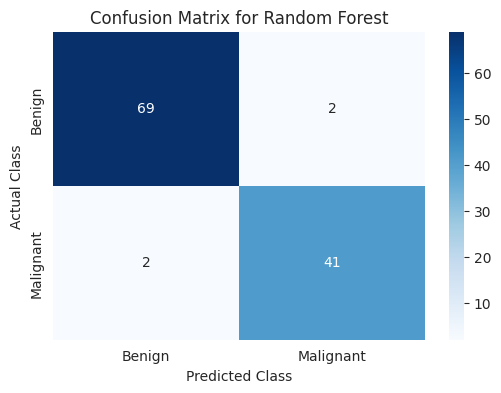

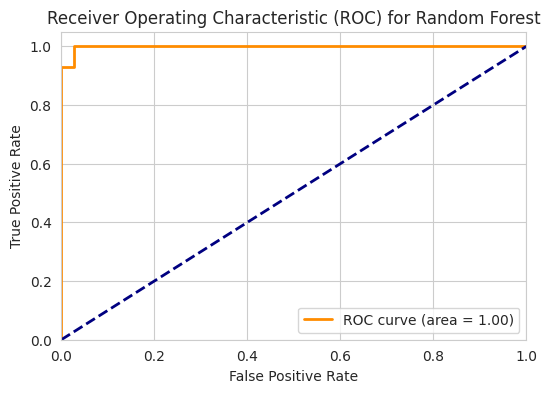

<Figure size 1000x600 with 0 Axes>

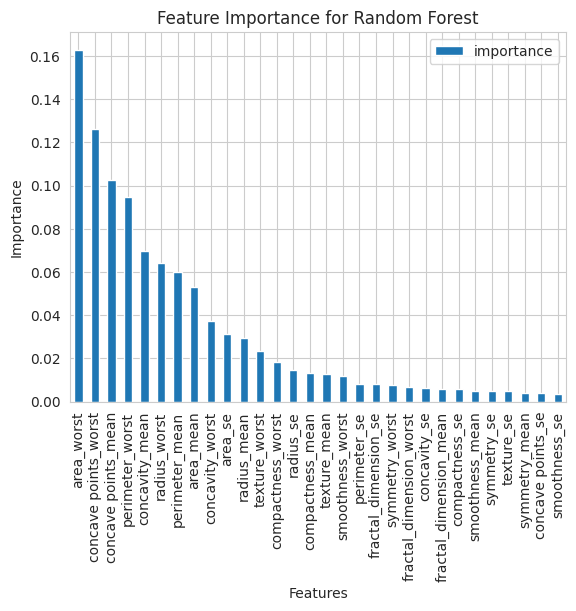

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Initialize the Random Forest classifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Train the classifier
rf.fit(X_train_smote, y_train_smote)

# Predict
y_pred_rf = rf.predict(X_test_scaled)
y_probs_rf = rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Print the evaluation metrics
print("\nPerformance Metrics for Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"AUC-ROC: {auc_rf:.2f}")

# Classification report and confusion matrix
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_mat_rf)

#VISUALIZATIONS:

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
# Random Forest provides a straightforward way to inspect feature importance

feature_importance_rf = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='bar')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**4. Decision Tree**


Performance Metrics for Decision Tree:
Accuracy: 0.97
Precision: 0.93
Recall: 1.00
F1 Score: 0.97
AUC-ROC: 0.98

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.93      1.00      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114


Confusion Matrix:
[[68  3]
 [ 0 43]]


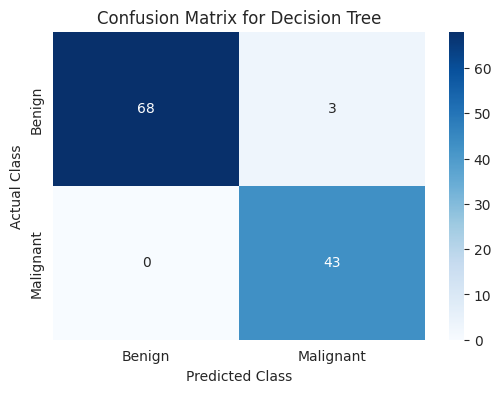

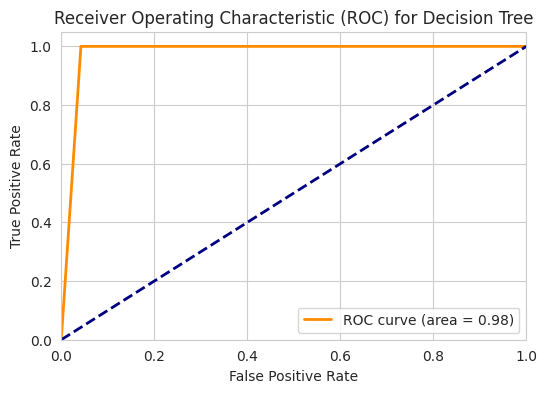

<Figure size 800x1000 with 0 Axes>

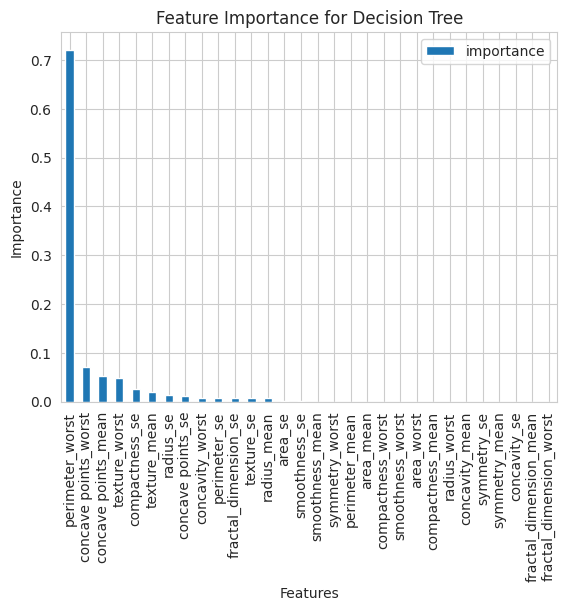

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Initialize the Decision Tree classifier with default parameters
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the SMOTE-resampled and scaled training data
dt.fit(X_train_smote, y_train_smote)

# Predict on the scaled test data
y_pred_dt = dt.predict(X_test_scaled)
y_probs_dt = dt.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_probs_dt)

# Print the evaluation metrics
print("\nPerformance Metrics for Decision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"AUC-ROC: {auc_dt:.2f}")

# Classification report and confusion matrix
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(conf_mat_dt)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance_dt = pd.DataFrame(dt.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(8, 10))
feature_importance_dt.plot(kind='bar')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Visualizing the Decsion Tree**

Provides valuable insights into the the logic and splits made by the model.

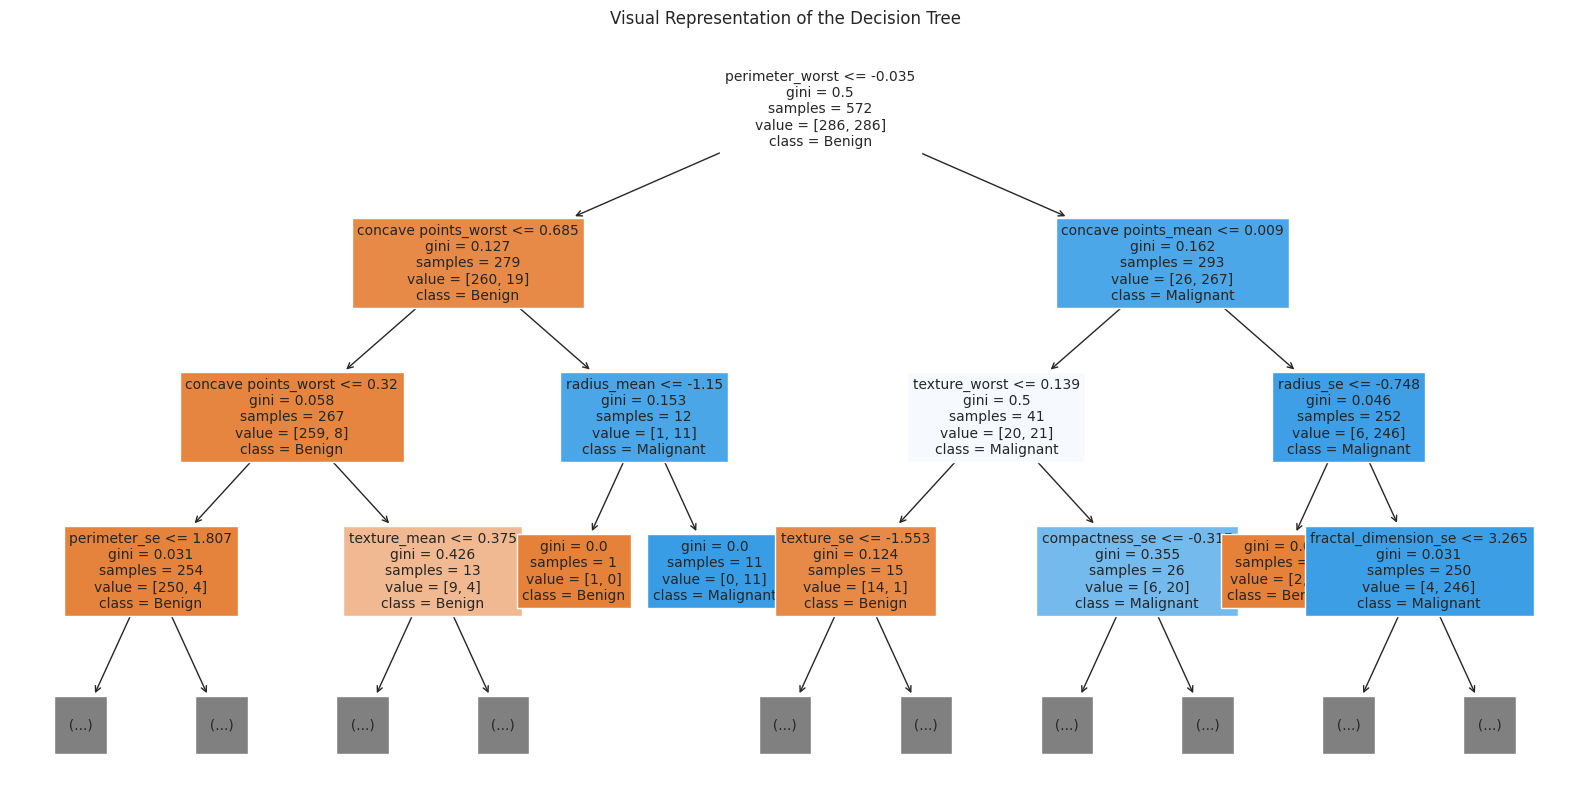

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# The decision tree classifier 'dt' has already been trained
# X_train_smote has feature names in the columns attribute

# Train the Decision Tree classifier on the SMOTE-resampled and scaled training data
dt.fit(X_train_smote, y_train_smote)

# Visualization of the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"], max_depth=3, fontsize=10)
plt.title('Visual Representation of the Decision Tree')
plt.show()


**5. Gradient Boosting**


Performance Metrics for Gradient Boosting:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
AUC-ROC: 1.00

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[69  2]
 [ 2 41]]


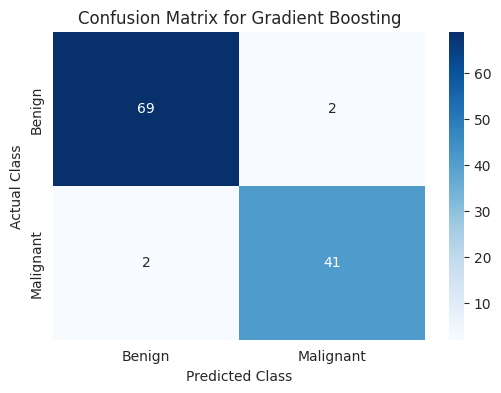

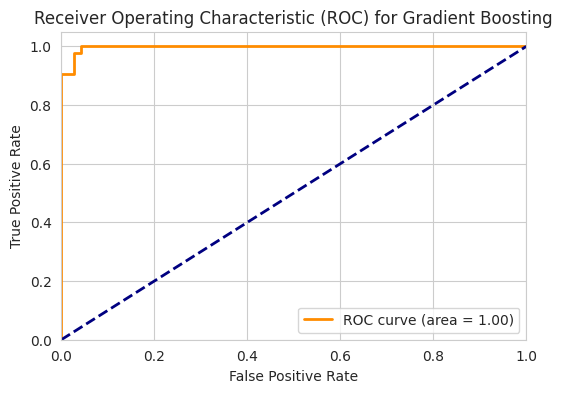

<Figure size 800x1000 with 0 Axes>

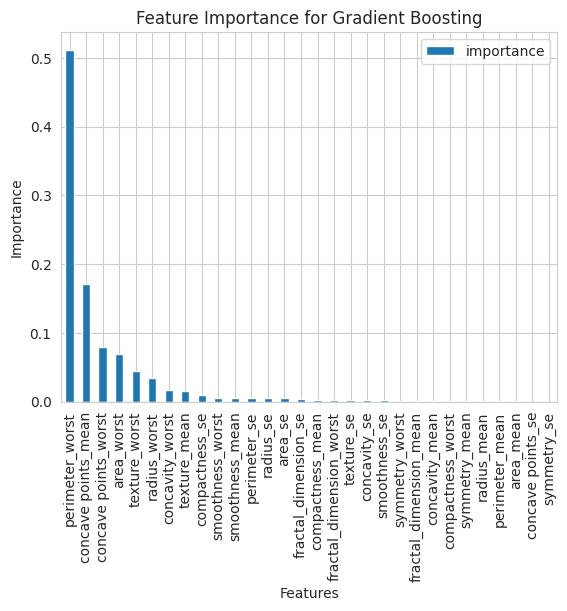

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Initialize the Gradient Boosting classifier with default parameters
gb = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb.fit(X_train_smote, y_train_smote)

# Predict on the scaled test data
y_pred_gb = gb.predict(X_test_scaled)
y_probs_gb = gb.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_probs_gb)

# Print the evaluation metrics
print("\nPerformance Metrics for Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")
print(f"AUC-ROC: {auc_gb:.2f}")

# Classification report and confusion matrix
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

conf_mat_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix:")
print(conf_mat_gb)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance_gb = pd.DataFrame(gb.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(8, 10))
feature_importance_gb.plot(kind='bar')
plt.title('Feature Importance for Gradient Boosting')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**6. XGBoost- Ensemble Technique**


Performance Metrics for XGBoost:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
AUC-ROC: 1.00

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[69  2]
 [ 2 41]]


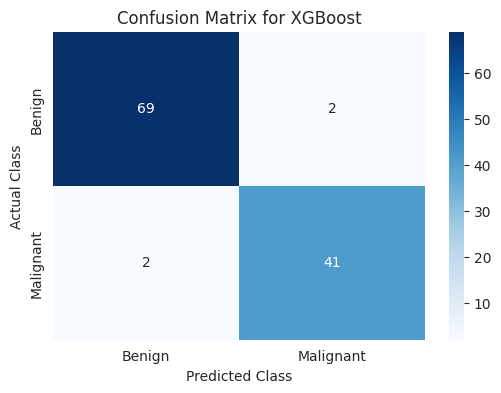

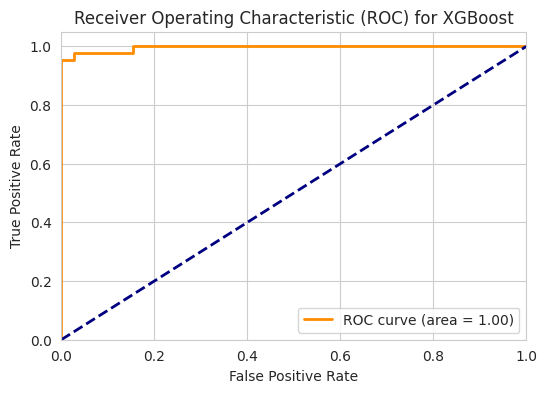

<Figure size 800x1000 with 0 Axes>

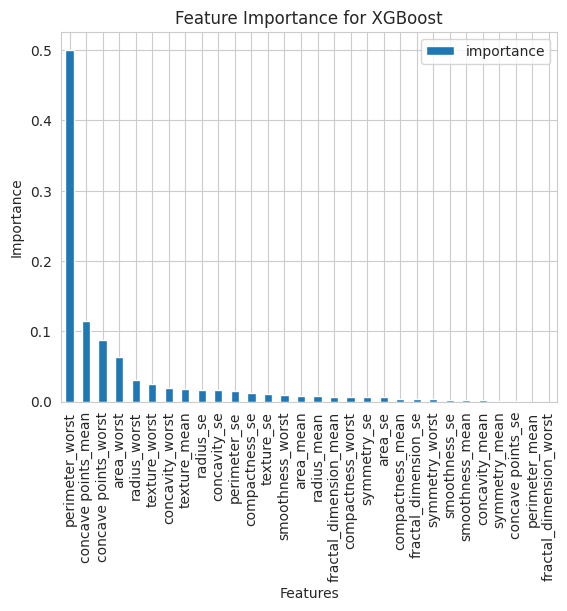

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Initialize the XGBoost classifier with default parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the classifier
xgb.fit(X_train_smote, y_train_smote)

# Prediction
y_pred_xgb = xgb.predict(X_test_scaled)
y_probs_xgb = xgb.predict_proba(X_test_scaled)[:, 1]  # Probabilities for AUC

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_probs_xgb)

# Print the evaluation metrics
print("\nPerformance Metrics for XGBoost:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_xgb:.2f}")

# Classification report and confusion matrix
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(conf_mat_xgb)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance_xgb = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(8, 10))
feature_importance_xgb.plot(kind='bar')
plt.title('Feature Importance for XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


**Applying a deep learning model:**

**Multilayer Perceptrons (MLPs)**

1. Set Up and train the MLP Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from tensorflow.keras.optimizers import Adam

# Model architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_smote.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, validation_split=0.2, epochs=50, verbose=1)


Epoch 1/50
15/15 [==============================] - 4s 21ms/step - loss: 0.6084 - accuracy: 0.7068 - val_loss: 0.4771 - val_accuracy: 0.9130
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.2976 - accuracy: 0.9497 - val_loss: 0.2517 - val_accuracy: 0.9565
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.1759 - accuracy: 0.9628 - val_loss: 0.1449 - val_accuracy: 0.9826
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.1257 - accuracy: 0.9694 - val_loss: 0.0933 - val_accuracy: 0.9826
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0977 - accuracy: 0.9825 - val_loss: 0.0654 - val_accuracy: 0.9913
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0831 - accuracy: 0.9803 - val_loss: 0.0483 - val_accuracy: 0.9913
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9825 - val_loss: 0.0404 - val_accuracy: 0.9913
Epoch 8/50
15/15 [=

2. Evaluate the Model and Visualize the Results

4/4 [==============================] - 0s 3ms/step

Performance Metrics:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1 Score: 0.96
AUC-ROC: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[70  1]
 [ 2 41]]


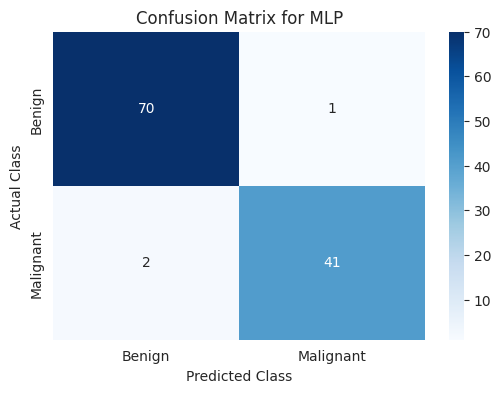

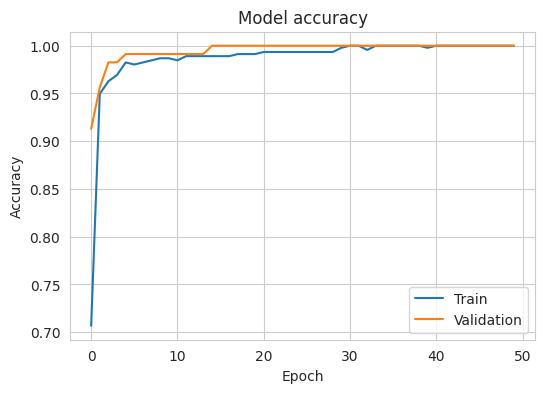

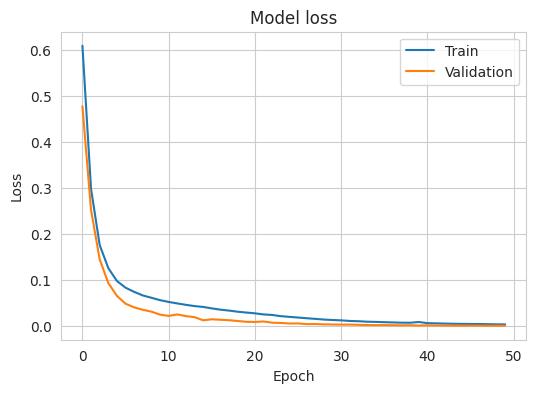

In [ ]:
# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_probs)

# Print the evaluation metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_mat = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_mat)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for MLP')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Long Short-Term Memory Networks (LSTMs)**

1. Setup and Train the LSTM Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Reshape input data to be 3D [samples, time steps, features] for LSTM
X_train_smote_reshaped = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model architecture
model = Sequential([
    LSTM(50, input_shape=(X_train_smote_reshaped.shape[1], X_train_smote_reshaped.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote_reshaped, y_train_smote, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
15/15 [==============================] - 6s 57ms/step - loss: 0.6628 - accuracy: 0.8840 - val_loss: 0.6421 - val_accuracy: 0.8696
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5770 - accuracy: 0.9190 - val_loss: 0.5385 - val_accuracy: 0.8870
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4460 - accuracy: 0.9322 - val_loss: 0.4013 - val_accuracy: 0.9043
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3068 - accuracy: 0.9387 - val_loss: 0.2800 - val_accuracy: 0.9217
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.2150 - accuracy: 0.9431 - val_loss: 0.1924 - val_accuracy: 0.9565
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.1566 - accuracy: 0.9540 - val_loss: 0.1351 - val_accuracy: 0.9826
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.1266 - accuracy: 0.9694 - val_loss: 0.0970 - val_accuracy: 0.9913
Epoch 8/50
15/15 [=

2. Evaluate the Model and Visualize the Results

4/4 [==============================] - 1s 4ms/step

Performance Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
AUC-ROC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
[[70  1]
 [ 1 42]]


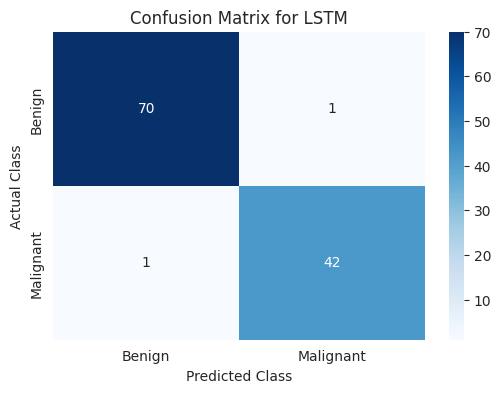

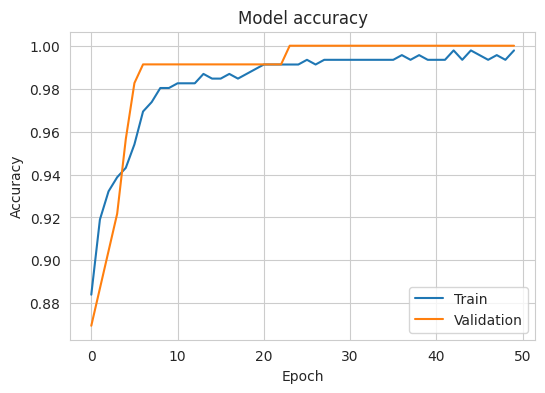

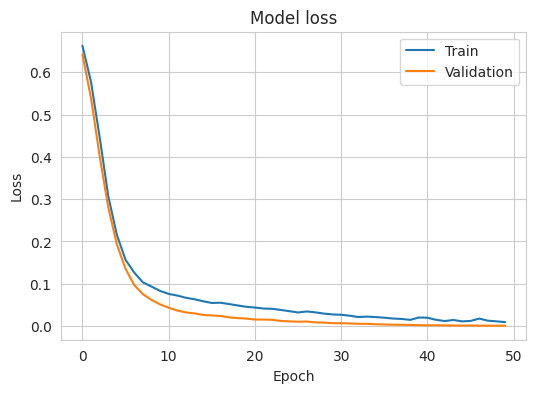

In [ ]:
# Predict probabilities
y_pred_probs = model.predict(X_test_scaled_reshaped)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_probs)

# Print the evaluation metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_mat = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_mat)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Convolutional Neural Networks (CNN)**

1. Setup and Train the 1D CNN Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# X_train_smote and X_test_scaled are already scaled and appropriate for model input
# Reshape data for 1D ConvNet: [samples, time steps, features]
X_train_smote_reshaped = X_train_smote.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))
X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_smote_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote_reshaped, y_train_smote, validation_split=0.2, epochs=50, verbose=1)


Epoch 1/50
15/15 [==============================] - 3s 36ms/step - loss: 0.5503 - accuracy: 0.7637 - val_loss: 0.4284 - val_accuracy: 0.8261
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.2706 - accuracy: 0.9059 - val_loss: 0.2379 - val_accuracy: 0.8696
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.1805 - accuracy: 0.9365 - val_loss: 0.1539 - val_accuracy: 0.9391
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1309 - accuracy: 0.9584 - val_loss: 0.0683 - val_accuracy: 0.9739
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1047 - accuracy: 0.9650 - val_loss: 0.0633 - val_accuracy: 0.9739
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0997 - accuracy: 0.9716 - val_loss: 0.0470 - val_accuracy: 0.9739
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0920 - accuracy: 0.9737 - val_loss: 0.0455 - val_accuracy: 0.9739
Epoch 8/50
15/15 [=

2. Evaluate the Model and Visualize the Results

4/4 [==============================] - 0s 29ms/step

Performance Metrics:
Accuracy: 0.96
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
AUC-ROC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[69  2]
 [ 2 41]]


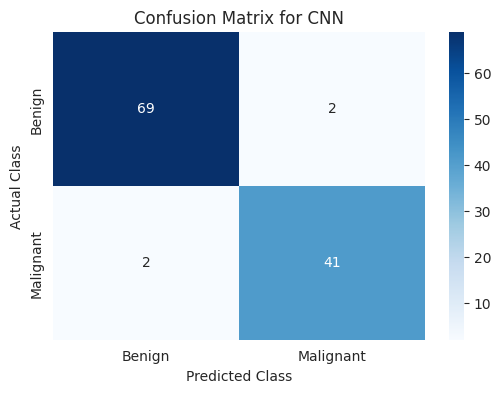

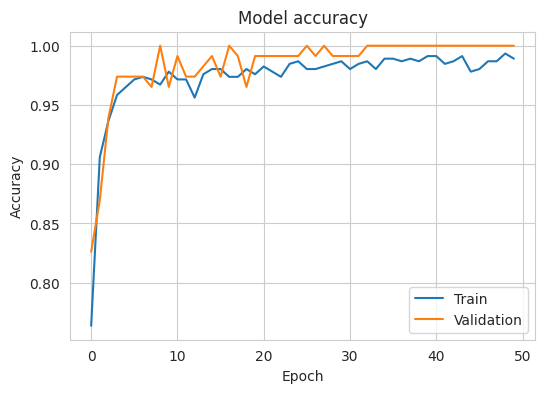

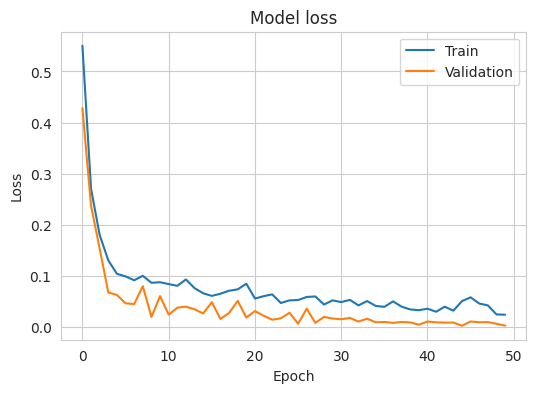

In [ ]:
# Predict probabilities
y_pred_probs = model.predict(X_test_scaled_reshaped)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_probs)

# Print the evaluation metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_mat = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_mat)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for CNN')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**COMPARATIVE ANALYSIS**

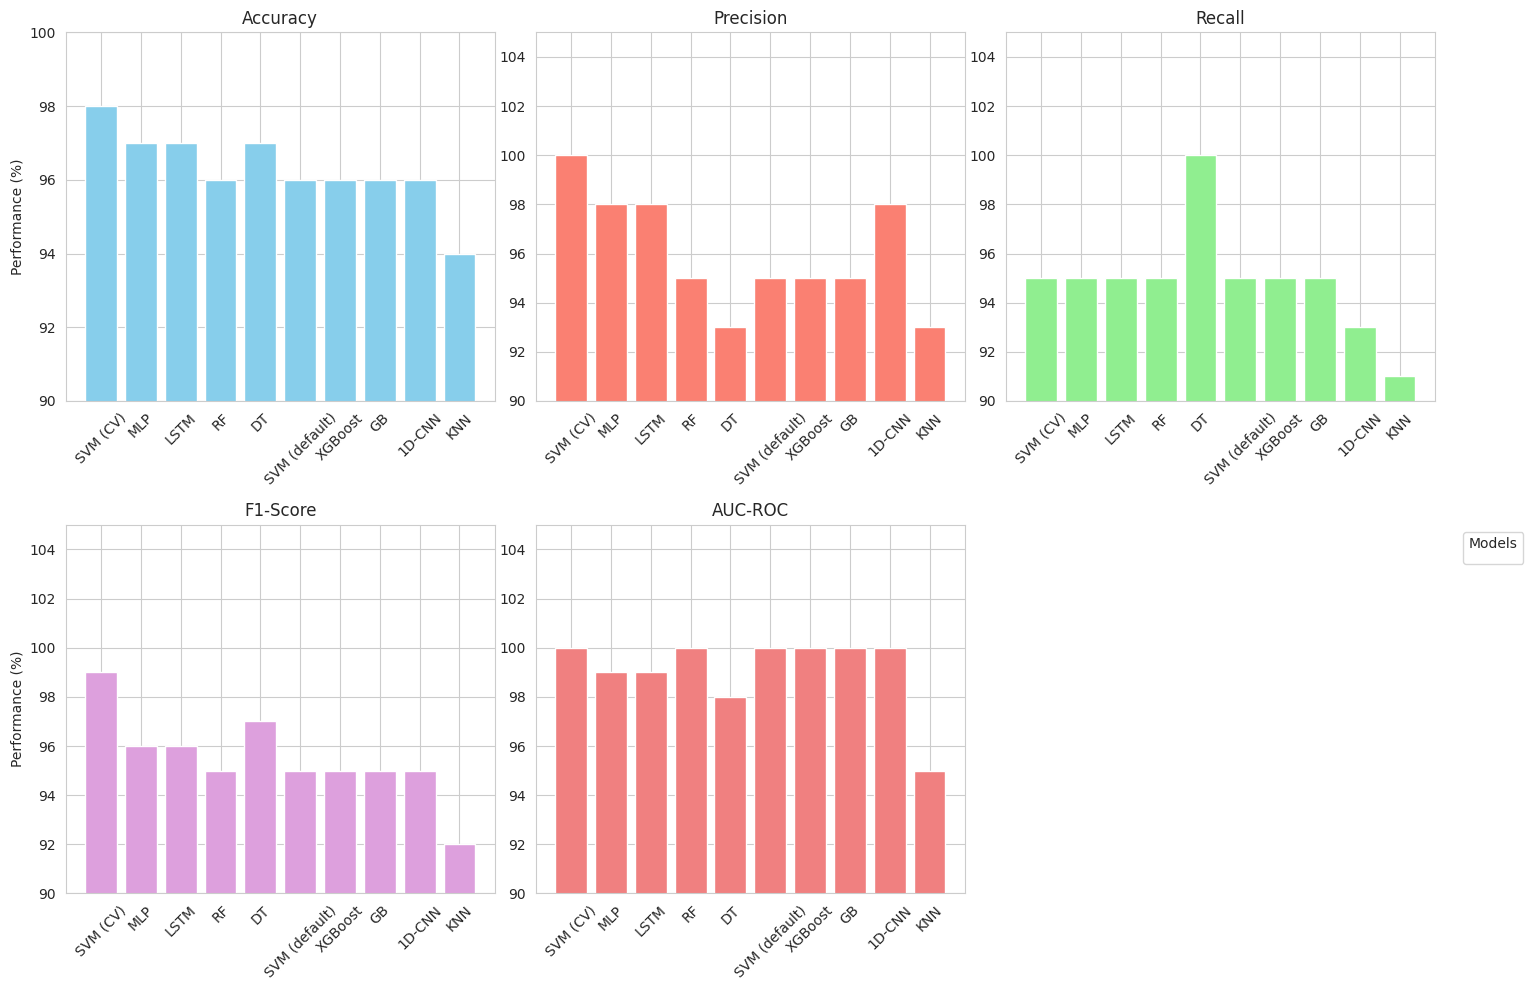

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['SVM (CV)', 'MLP', 'LSTM', 'RF', 'DT', 'SVM (default)', 'XGBoost', 'GB', '1D-CNN', 'KNN']
accuracy = [98, 97, 97, 96, 97, 96, 96, 96, 96, 94]
precision = [100, 98, 98, 95, 93, 95, 95, 95, 98, 93]
recall = [95, 95, 95, 95, 100, 95, 95, 95, 93, 91]
f1_score = [99, 96, 96, 95, 97, 95, 95, 95, 95, 92]
auc_roc = [100, 99, 99, 100, 98, 100, 100, 100, 100, 95]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Accuracy
axs[0, 0].bar(models, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Performance (%)')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_ylim([90, 100])

# Precision
axs[0, 1].bar(models, precision, color='salmon')
axs[0, 1].set_title('Precision')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_ylim([90, 105])

# Recall
axs[0, 2].bar(models, recall, color='lightgreen')
axs[0, 2].set_title('Recall')
axs[0, 2].tick_params(axis='x', rotation=45)
axs[0, 2].set_ylim([90, 105])

# F1-Score
axs[1, 0].bar(models, f1_score, color='plum')
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_ylabel('Performance (%)')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylim([90, 105])

# AUC-ROC
axs[1, 1].bar(models, auc_roc, color='lightcoral')
axs[1, 1].set_title('AUC-ROC')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_ylim([90, 105])

# Hide the empty subplot
axs[1, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Create legend outside the plot
plt.subplots_adjust(right=0.8)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Accuracy**

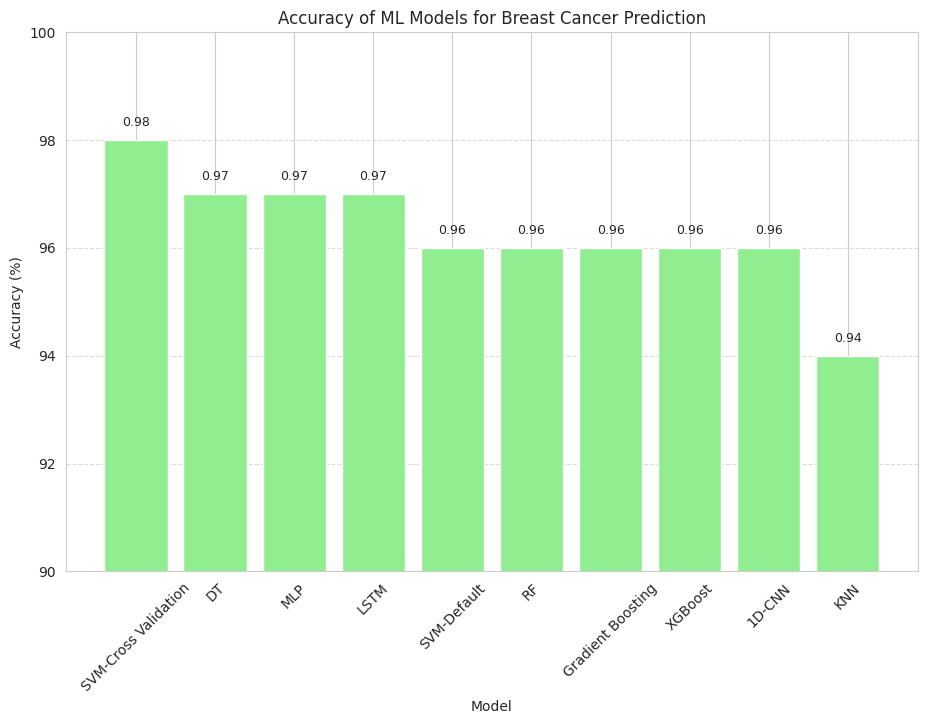

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the user
data = {
    "Model": ["KNN", "SVM-Default", "SVM-Cross Validation", "RF", "DT", "Gradient Boosting",
              "XGBoost", "MLP", "LSTM", "1D-CNN"],
    "Accuracy": [0.94, 0.96, 0.98, 0.96, 0.97, 0.96, 0.96, 0.97, 0.97, 0.96]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by accuracy in descending order
df_sorted = df.sort_values(by='Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(11, 7))
plt.bar(df_sorted['Model'], df_sorted['Accuracy']*100, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of ML Models for Breast Cancer Prediction')
plt.xticks(rotation=45)
plt.ylim([90, 100])  # Adjust the scale for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to bars
for i, acc in enumerate(df_sorted['Accuracy']):
    plt.text(i, acc*100 + 0.2, f'{acc:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

**Precision**

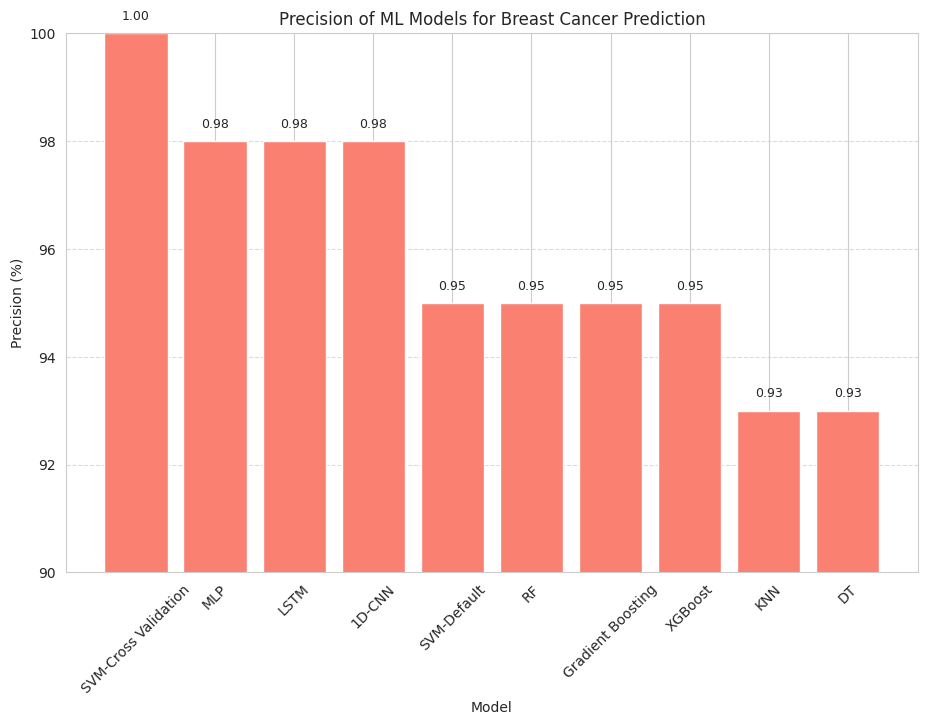

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the user
data = {
    "Model": ["KNN", "SVM-Default", "SVM-Cross Validation", "RF", "DT", "Gradient Boosting",
              "XGBoost", "MLP", "LSTM", "1D-CNN"],
    "Precision": [0.93, 0.95, 1.00, 0.95, 0.93, 0.95, 0.95, 0.98, 0.98, 0.98]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by precision in descending order
df_sorted = df.sort_values(by='Precision', ascending=False)

# Plotting
plt.figure(figsize=(11, 7))
plt.bar(df_sorted['Model'], df_sorted['Precision']*100, color='salmon')
plt.xlabel('Model')
plt.ylabel('Precision (%)')
plt.title('Precision of ML Models for Breast Cancer Prediction')
plt.xticks(rotation=45)
plt.ylim([90, 100])  # Adjust the scale for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to bars
for i, prec in enumerate(df_sorted['Precision']):
    plt.text(i, prec*100 + 0.2, f'{prec:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

**Recall**

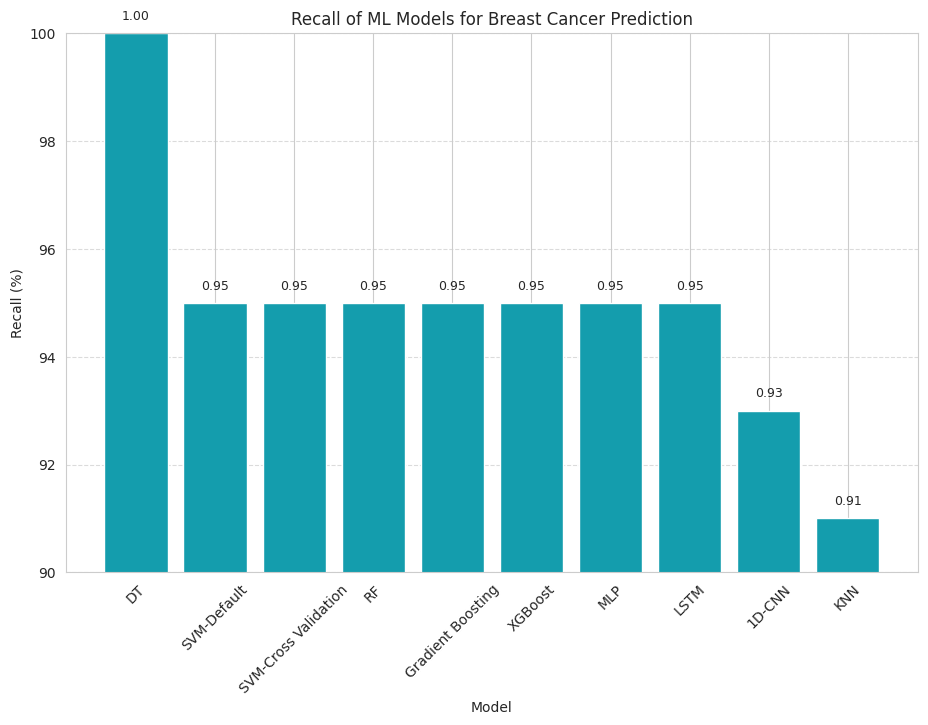

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the user
data = {
    "Model": ["KNN", "SVM-Default", "SVM-Cross Validation", "RF", "DT", "Gradient Boosting",
              "XGBoost", "MLP", "LSTM", "1D-CNN"],
    "Recall": [0.91, 0.95, 0.95, 0.95, 1.00, 0.95, 0.95, 0.95, 0.95, 0.93]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by recall in descending order
df_sorted = df.sort_values(by='Recall', ascending=False)

# Plotting
plt.figure(figsize=(11, 7))
plt.bar(df_sorted['Model'], df_sorted['Recall']*100, color='#149DAD')
plt.xlabel('Model')
plt.ylabel('Recall (%)')
plt.title('Recall of ML Models for Breast Cancer Prediction')
plt.xticks(rotation=45)
plt.ylim([90, 100])  # Adjust the scale for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to bars
for i, rec in enumerate(df_sorted['Recall']):
    plt.text(i, rec*100 + 0.2, f'{rec:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

**F1-Score**

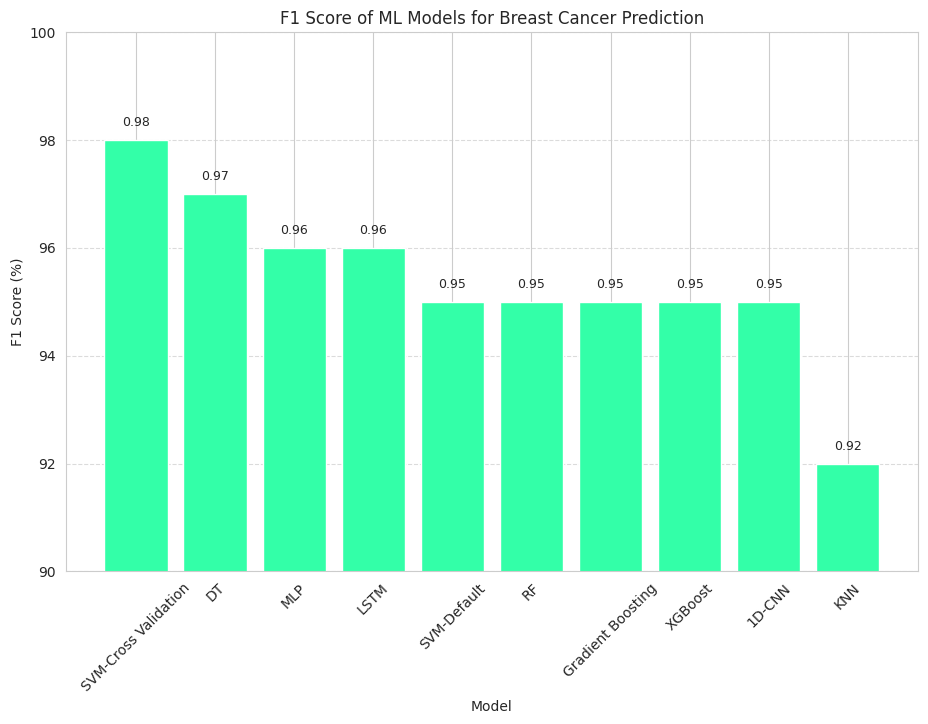

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the user
data = {
    "Model": ["KNN", "SVM-Default", "SVM-Cross Validation", "RF", "DT", "Gradient Boosting",
              "XGBoost", "MLP", "LSTM", "1D-CNN"],
    "F1 Score": [0.92, 0.95, 0.98, 0.95, 0.97, 0.95, 0.95, 0.96, 0.96, 0.95]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by F1 Score in descending order
df_sorted = df.sort_values(by='F1 Score', ascending=False)

# Plotting
plt.figure(figsize=(11, 7))
plt.bar(df_sorted['Model'], df_sorted['F1 Score']*100, color='#33FFA8')
plt.xlabel('Model')
plt.ylabel('F1 Score (%)')
plt.title('F1 Score of ML Models for Breast Cancer Prediction')
plt.xticks(rotation=45)
plt.ylim([90, 100])  # Adjust the scale for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to bars
for i, f1 in enumerate(df_sorted['F1 Score']):
    plt.text(i, f1*100 + 0.2, f'{f1:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

**AUC-ROC**

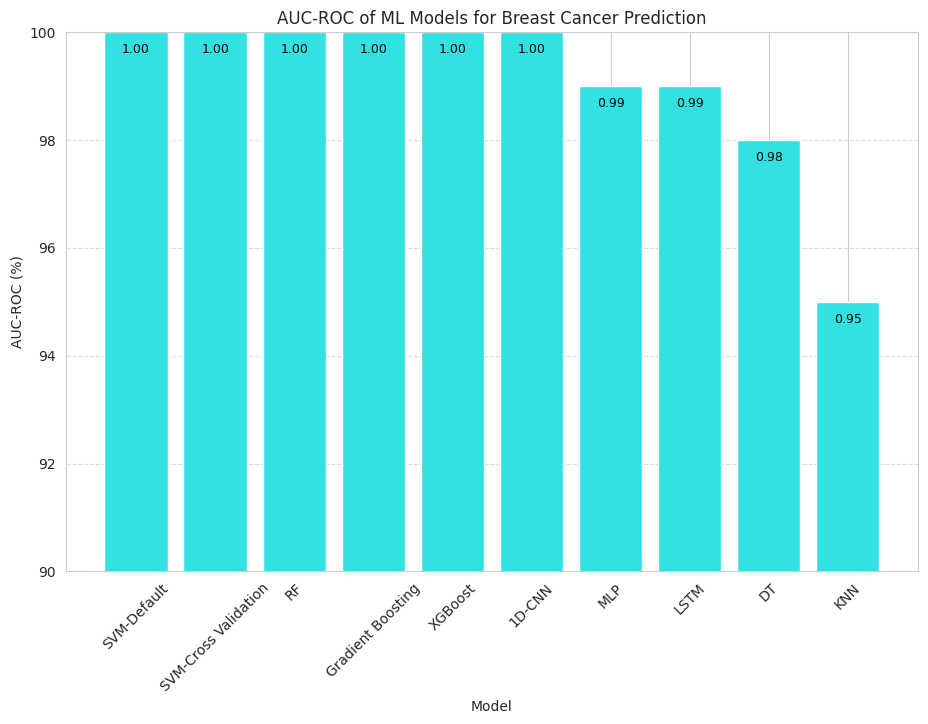

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the user
data = {
    "Model": ["KNN", "SVM-Default", "SVM-Cross Validation", "RF", "DT", "Gradient Boosting",
              "XGBoost", "MLP", "LSTM", "1D-CNN"],
    "AUC-ROC": [0.95, 1.00, 1.00, 1.00, 0.98, 1.00, 1.00, 0.99, 0.99, 1.00]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by AUC-ROC in descending order
df_sorted = df.sort_values(by='AUC-ROC', ascending=False)

# Plotting
plt.figure(figsize=(11, 7))
bars = plt.bar(df_sorted['Model'], df_sorted['AUC-ROC']*100, color='#32E2E2')
plt.xlabel('Model')
plt.ylabel('AUC-ROC (%)')
plt.title('AUC-ROC of ML Models for Breast Cancer Prediction')
plt.xticks(rotation=45)
plt.ylim([90, 100])  # Adjust the scale for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to bars inside the bars
for bar, auc_roc in zip(bars, df_sorted['AUC-ROC']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2, f'{auc_roc:.2f}',
             ha='center', va='top', color='black', fontsize=9)

plt.show()


**Average Performance**

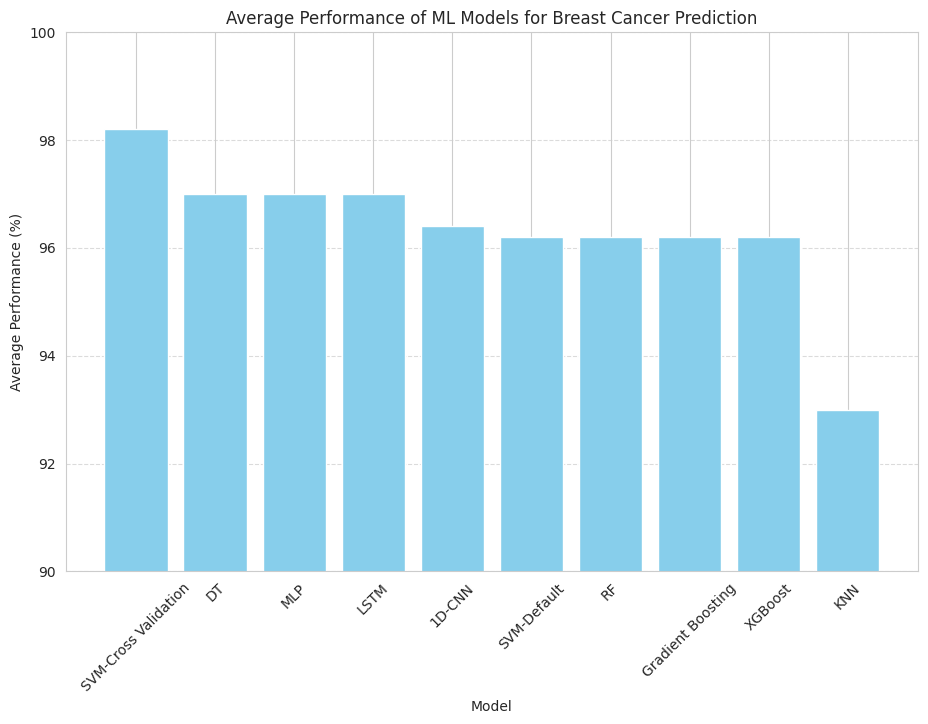

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the user
data = {
    "Model": ["KNN", "SVM-Default", "SVM-Cross Validation", "RF", "DT", "Gradient Boosting",
              "XGBoost", "MLP", "LSTM", "1D-CNN"],
    "Accuracy": [0.94, 0.96, 0.98, 0.96, 0.97, 0.96, 0.96, 0.97, 0.97, 0.96],
    "Precision": [0.93, 0.95, 1.00, 0.95, 0.93, 0.95, 0.95, 0.98, 0.98, 0.98],
    "Recall": [0.91, 0.95, 0.95, 0.95, 1.00, 0.95, 0.95, 0.95, 0.95, 0.93],
    "F1 Score": [0.92, 0.95, 0.98, 0.95, 0.97, 0.95, 0.95, 0.96, 0.96, 0.95],
    "AUC-ROC": [0.95, 1.00, 1.00, 1.00, 0.98, 1.00, 1.00, 0.99, 0.99, 1.00]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Compute the average performance
df['Average'] = df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']].mean(axis=1)

# Sort the DataFrame by the average performance in descending order
df_sorted = df.sort_values(by='Average', ascending=False)

# Plotting
plt.figure(figsize=(11, 7))
plt.bar(df_sorted['Model'], df_sorted['Average']*100, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average Performance (%)')
plt.title('Average Performance of ML Models for Breast Cancer Prediction')
plt.xticks(rotation=45)
plt.ylim([90, 100])  # Adjust the scale for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Including the lables:

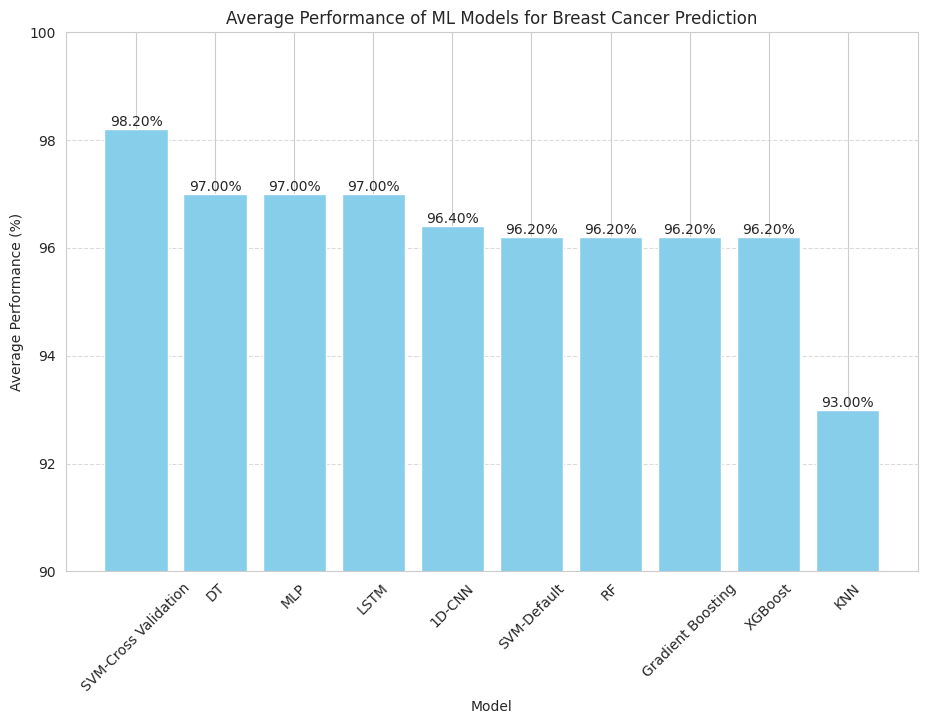

In [ ]:
# Plotting with percentage labels on each bar
plt.figure(figsize=(11, 7))
bars = plt.bar(df_sorted['Model'], df_sorted['Average']*100, color='skyblue')

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Average Performance (%)')
plt.title('Average Performance of ML Models for Breast Cancer Prediction')
plt.xticks(rotation=45)
plt.ylim([90, 100])  # Adjust the scale for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()